In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Web Mining/webmining

/content/drive/MyDrive/Web Mining/webmining


In [5]:
pwd

'/content/drive/MyDrive/Web Mining'

In [12]:
import pandas as pd
data = pd.read_csv('datascrapig.csv')
data

,Tweet,label
0,Salfok sama lukisan the smiling general,positif
1,Semoga amanah ðŸ‘ðŸ‘ðŸ»ðŸ‘ðŸ»ðŸ”¥ðŸ”¥ðŸ”¥,positif
2,â¤ï¸â¤ï¸,negatif
3,"â¤ðŸ‡®ðŸ‡©ðŸ‘ðŸ»semoga amanah,amin ðŸ¤²ðŸ»...",positif
4,Semoga Amanah Bapak HakimðŸ™ðŸ™ðŸ™,positif
5,kurang bermanfaat,negatif
6,Selamat bertugas Pak Hakim. Semoga hukum menja...,positif
7,buat apaan ini?,negatif
8,ðŸ™ŒAamin3 ðŸ™Œ ðŸ‘â¤ðŸ’ŽðŸ’“ðŸ˜˜ðŸ’“ðŸ’Žâ¤...,negatif
9,selamat bekerja semoga AMANAH ya pak. ðŸ˜ðŸ˜...,positif


In [2]:
!pip install nltk
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.0 MB/s 


In [3]:
import pandas as pd
import re
import numpy as np

import nltk
nltk.download('punkt')
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
def remove_stopwords(text):
    with open('/content/drive/MyDrive/Web Mining/webmining/stopwords.txt') as f:
        stopwords = f.readlines()
        stopwords = [x.strip() for x in stopwords]
    
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stopwords]
                     
    return text

In [16]:
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    result = [stemmer.stem(word) for word in text]
    
    return result

In [17]:
def preprocessing(text):
    #case folding
    text = text.lower()

    #remove non ASCII (emoticon, chinese word, .etc)
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('\\f'," ").replace('\\r'," ")

    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')

    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

    #replace weird characters
    text = text.replace('“', '"')
    text = text.replace('”', '"')
    text = text.replace('-', ' ')

    #tokenization and remove stopwords
    text = remove_stopwords(text)

    #remove punctuation    
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]  

    #stemming
    text = stemming(text)

    #remove empty string
    text = list(filter(None, text))
    return text

In [18]:
data['Tweet'].apply(preprocessing).to_csv('hasilpreig.csv')

In [3]:
import pandas as pd
import numpy as np
dataPre = pd.read_csv('hasilpreig.csv')
dataPre

,Unnamed: 0,Tweet
0,0,"['salfok', 'lukis', 'the', 'smiling', 'general']"
1,1,"['moga', 'amanah']"
2,2,[]
3,3,"['moga', 'amanah', 'amin']"
4,4,"['moga', 'amanah', 'hakim']"
5,5,['manfaat']
6,6,"['selamat', 'tugas', 'hakim', 'moga', 'hukum',..."
7,7,[]
8,8,['aamin3']
9,9,"['selamat', 'moga', 'amanah', 'ya']"


In [4]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
dataTextPre = pd.read_csv('/content/drive/MyDrive/Web Mining/webmining/hasilpreig.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['Tweet'])

In [5]:
matrik_vsm = bag.toarray()
matrik_vsm.shape

(15, 52)

In [6]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

In [7]:
a = vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
dataTF = pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

,2024,aamin3,adil,amanah,amin,blom,dedengkotnye,general,hakim,hukum,...,tempat,terus,the,tolak,tugas,tumpul,tzakarta,ya,yg,yo
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
label = pd.read_csv('/content/drive/MyDrive/Web Mining/webmining/datascrapig.csv')
dataVSM = pd.concat([dataTF.reset_index(), label["label"]], axis=1)
dataVSM

,"(index,)","(2024,)","(aamin3,)","(adil,)","(amanah,)","(amin,)","(blom,)","(dedengkotnye,)","(general,)","(hakim,)",...,"(terus,)","(the,)","(tolak,)","(tugas,)","(tumpul,)","(tzakarta,)","(ya,)","(yg,)","(yo,)",label
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,positif
1,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negatif
3,4,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positif
4,5,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,positif
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negatif
6,7,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,positif
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negatif
8,9,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negatif
9,10,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,positif


In [10]:
dataVSM['label'].unique()

array(['positif', 'negatif'], dtype=object)

In [11]:
dataVSM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   (index,)         15 non-null     int64 
 1   (2024,)          15 non-null     int64 
 2   (aamin3,)        15 non-null     int64 
 3   (adil,)          15 non-null     int64 
 4   (amanah,)        15 non-null     int64 
 5   (amin,)          15 non-null     int64 
 6   (blom,)          15 non-null     int64 
 7   (dedengkotnye,)  15 non-null     int64 
 8   (general,)       15 non-null     int64 
 9   (hakim,)         15 non-null     int64 
 10  (hukum,)         15 non-null     int64 
 11  (identitas,)     15 non-null     int64 
 12  (indonesia,)     15 non-null     int64 
 13  (jalan,)         15 non-null     int64 
 14  (jokowi,)        15 non-null     int64 
 15  (kampanye,)      15 non-null     int64 
 16  (kau,)           15 non-null     int64 
 17  (keliling,)      15 non-null     int6

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataVSM.drop(labels=['label'], axis=1),
    dataVSM['label'],
    test_size=0.3,
    random_state=0)

In [13]:
X_train

,"(index,)","(2024,)","(aamin3,)","(adil,)","(amanah,)","(amin,)","(blom,)","(dedengkotnye,)","(general,)","(hakim,)",...,"(tempat,)","(terus,)","(the,)","(tolak,)","(tugas,)","(tumpul,)","(tzakarta,)","(ya,)","(yg,)","(yo,)"
4,5,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,14,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,11,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,12,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,13,1,0,0,0,0,1,1,0,0,...,0,1,0,1,0,0,1,0,1,0


In [14]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.        , 0.        , 0.00777778, 1.24730159,
       0.        , 0.12599206, 0.        , 0.        , 0.        ,
       0.30730159, 0.        , 0.        , 0.        , 0.0393254 ,
       0.        , 0.        , 0.        , 0.10515873, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08694444, 0.        , 0.        , 0.00515873,
       0.        , 0.        , 0.        , 0.07861111, 0.        ,
       0.        , 0.24063492, 0.37896825, 0.        , 0.        ,
       0.00539683, 0.        , 0.0268254 , 0.        , 0.        ,
       0.10563492, 0.        , 0.04730159, 0.        , 0.        ,
       0.04611111, 0.0718254 , 0.01706349])

In [16]:
from sklearn.neighbors import KNeighborsClassifier
testing=[]
listnum=[]
for i in range(2,9):
  listnum.append(i)
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  Y_pred = neigh.predict(X_test) 
  testing.append(Y_pred)
testing

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

[array(['negatif', 'negatif', 'negatif', 'negatif', 'positif'],
       dtype=object),
 array(['positif', 'negatif', 'negatif', 'positif', 'positif'],
       dtype=object),
 array(['positif', 'negatif', 'negatif', 'negatif', 'positif'],
       dtype=object),
 array(['positif', 'negatif', 'positif', 'positif', 'positif'],
       dtype=object),
 array(['negatif', 'negatif', 'positif', 'positif', 'negatif'],
       dtype=object),
 array(['positif', 'positif', 'positif', 'positif', 'positif'],
       dtype=object),
 array(['positif', 'positif', 'positif', 'positif', 'positif'],
       dtype=object)]

In [17]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
listtest=[]
listacc=[]
for i in range(len(testing)):
  accuracy_neigh=round(accuracy_score(y_test,testing[i])* 100, 2)
  acc_neigh = round(neigh.score(X_train, y_train) * 100, 2)
  listappend=listnum[i]
  appendlist=listappend,accuracy_neigh
  listtest.append(appendlist)
  listacc.append(accuracy_neigh)
listtest

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.

[(2, 40.0), (3, 80.0), (4, 60.0), (5, 60.0), (6, 20.0), (7, 80.0), (8, 80.0)]

Text(0.5, 0, 'Nilai n')

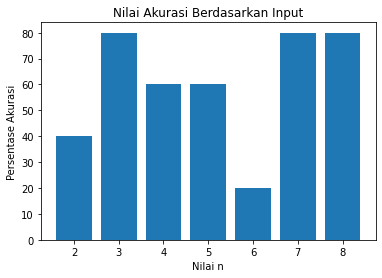

In [18]:
from matplotlib import pyplot as plt
plt.bar(listnum, listacc)
plt.xticks(listnum)
plt.title('Nilai Akurasi Berdasarkan Input')
plt.ylabel('Persentase Akurasi')
plt.xlabel('Nilai n')

In [19]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)
from sklearn.metrics import make_scorer, accuracy_score,precision_score
testing = neigh.predict(X_test)
accuracy_neigh=round(accuracy_score(y_test,testing)* 100, 2)
accuracy_neigh

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


80.0